In [32]:
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
import numpy as np

mydata = mypd.read_csv('Wine.csv')
mydata

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


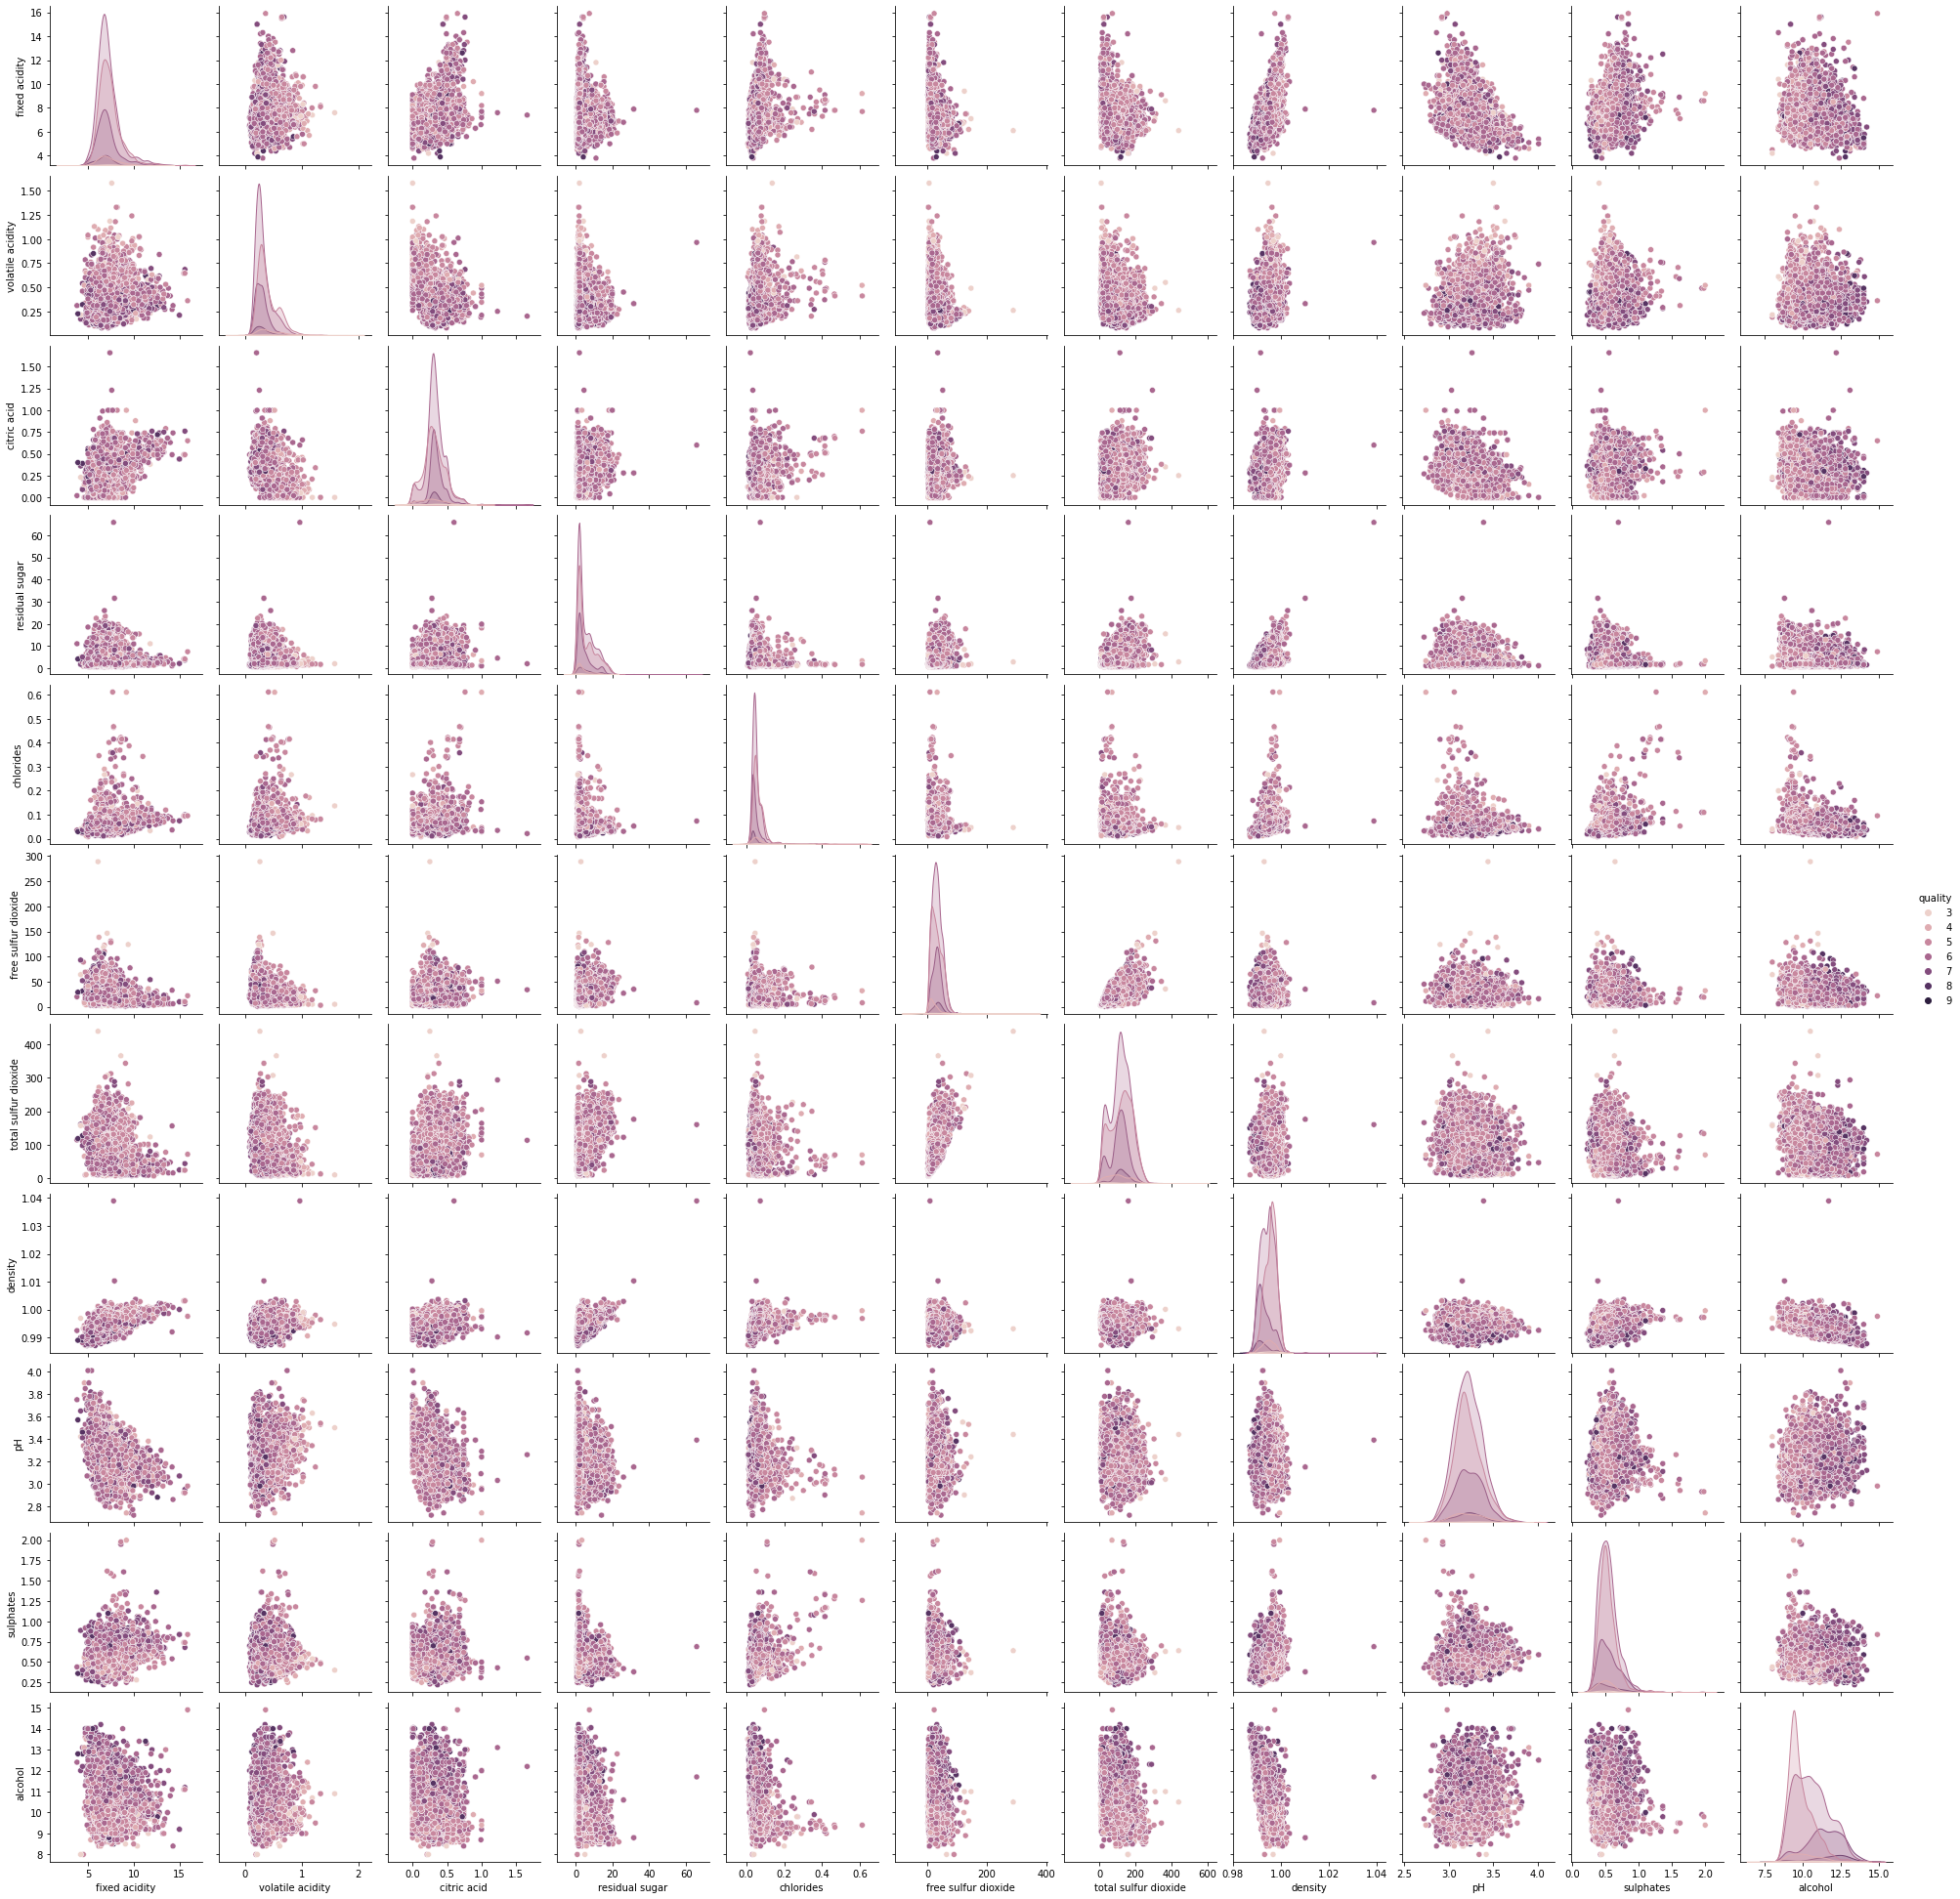

In [33]:
mysb.pairplot(mydata,hue='quality')
myplot.show()

In [34]:
x=mydata.iloc[:,1:12]
y=mydata.quality

In [35]:
mydata.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [36]:
for col in mydata.columns:
    if mydata[col].isnull().sum() > 0:
        mydata[col] = mydata[col].fillna(mydata[col].mean())

mydata.isnull().sum().sum()

0

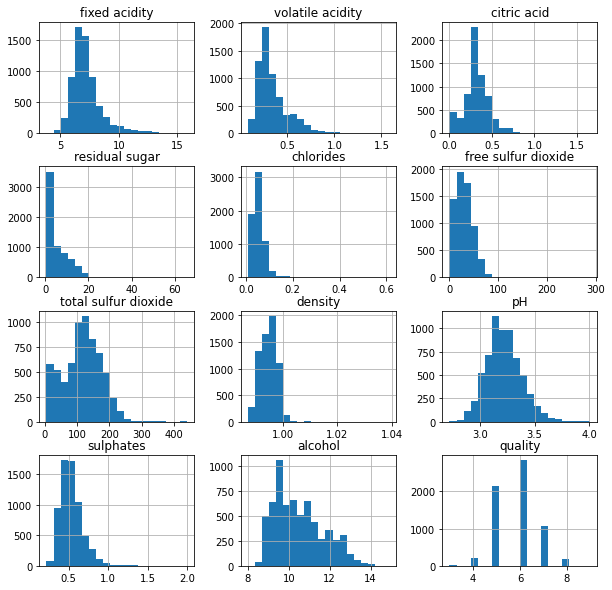

In [37]:
mydata.hist(bins=20,figsize=[10,10])
myplot.show()


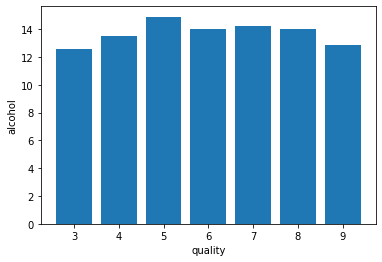

In [38]:
myplot.bar(mydata['quality'],mydata['alcohol'])
myplot.xlabel('quality')
myplot.ylabel('alcohol')
myplot.show()

/tmp/ipykernel_2559/367639910.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mysb.heatmap(mydata.corr(),annot=True)


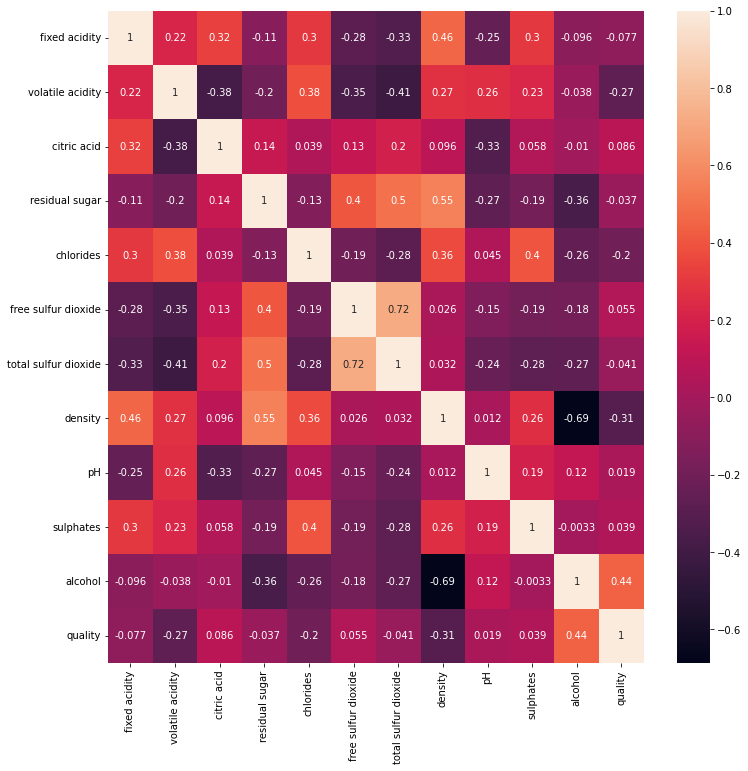

In [39]:
myplot.figure(figsize=[12,12])
mysb.heatmap(mydata.corr(),annot=True)
myplot.show()


In [40]:
mydata.replace({'white':1,'red':0},inplace=True)

In [41]:
mydata['best quality'] = mydata.quality.apply(lambda x:1 if x>5 else 0)
mydata["best quality"].value_counts()

1    4113
0    2384
Name: best quality, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
features = mydata.drop(['quality','best quality'],axis =1)
target = mydata['best quality']

xtrain,xtest,ytrain,ytest = train_test_split(features, target,test_size=0.2,random_state=10,shuffle=True)

xtrain.shape,xtest.shape

((5197, 12), (1300, 12))

In [43]:
model=LogisticRegression()

model.fit(xtrain,ytrain)

/home/nasc/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
ypred=model.predict(xtest)

In [45]:
from sklearn import metrics
model_acc=accuracy_score(ypred,ytest)

In [46]:
round(model_acc*100,2)

73.31

In [47]:
mymatrix = confusion_matrix(ypred,ytest)
mymatrix

array([[251, 135],
       [212, 702]])

In [51]:
print(metrics.classification_report(ytest,model.predict(xtest)))

              precision    recall  f1-score   support

           0       0.65      0.54      0.59       463
           1       0.77      0.84      0.80       837

    accuracy                           0.73      1300
   macro avg       0.71      0.69      0.70      1300
weighted avg       0.73      0.73      0.73      1300

